In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [21]:
df = pd.read_csv('/content/house_prices_dataset.csv')

In [60]:
df.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


In [22]:
df.isnull().sum()

,0
square_feet,0
num_rooms,0
age,0
distance_to_city(km),0
price,0


In [23]:
df.shape

(10000, 5)

In [24]:
df.describe()

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138249
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


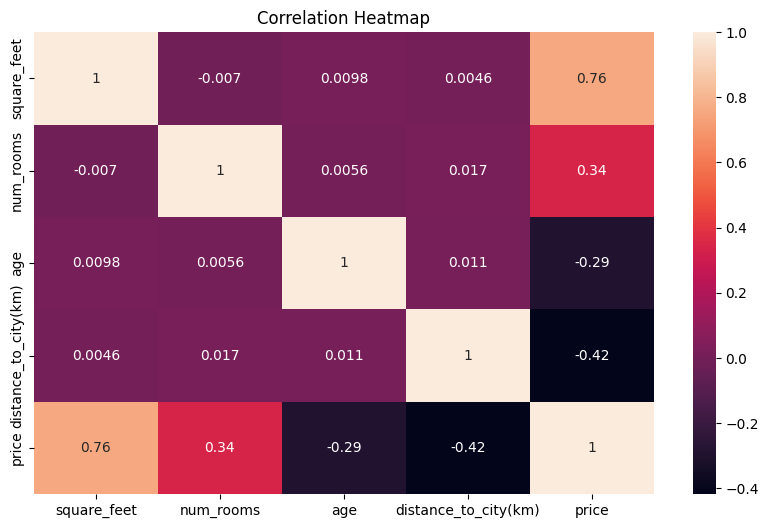

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

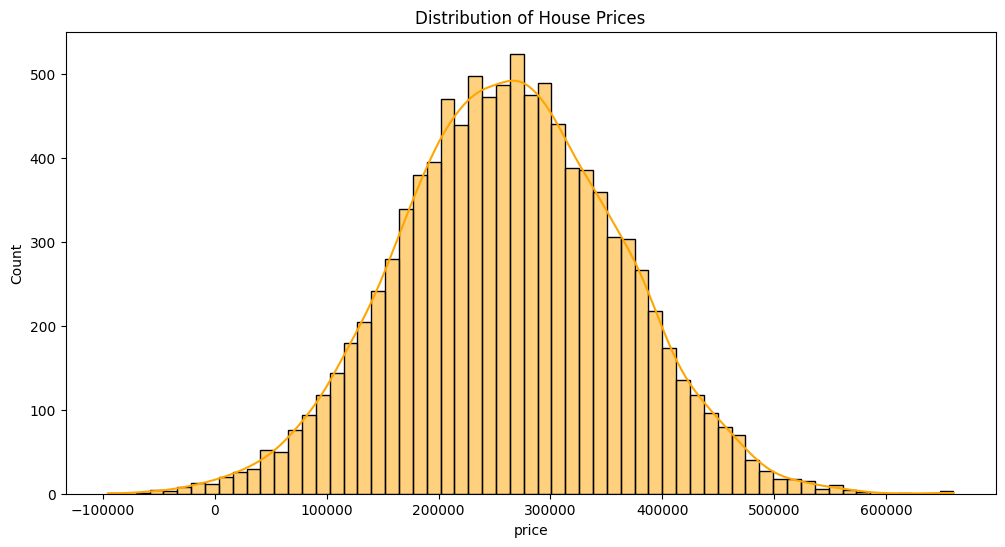

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df['price'], kde=True,color= 'Orange')
plt.title('Distribution of House Prices')
plt.show()

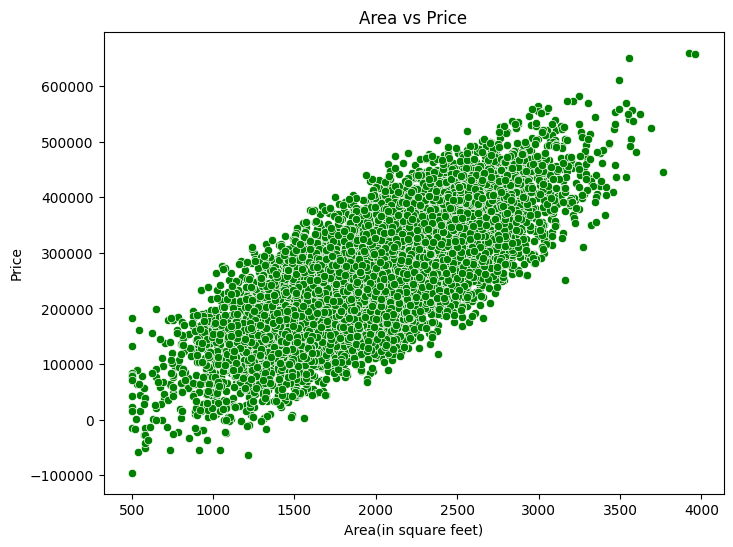

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'square_feet', y = 'price',data=df, color='green')
plt.xlabel('Area(in square feet)')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()

/tmp/ipython-input-3864819493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='num_rooms', y='price', data=df,palette='mako')


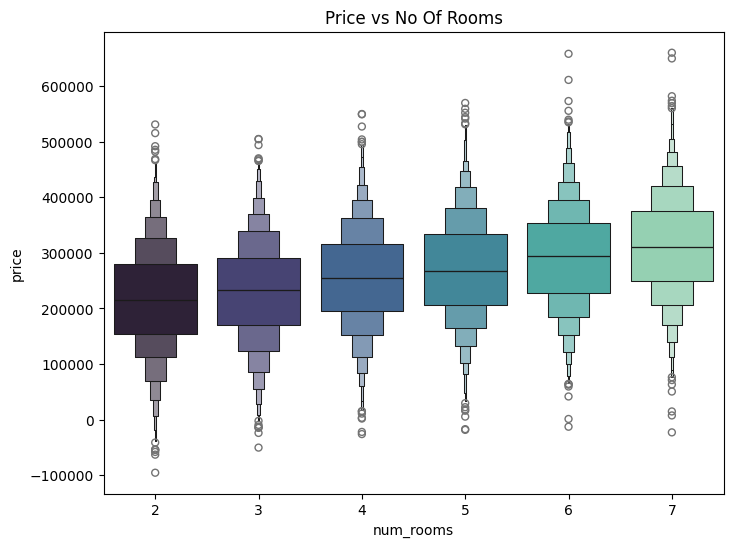

In [44]:
plt.figure(figsize=(8,6))
sns.boxenplot(x='num_rooms', y='price', data=df,palette='mako')
plt.xlabel('num_rooms')
plt.ylabel('price')
plt.title('Price vs No Of Rooms')
plt.show()

In [53]:
df.columns

Index(['square_feet', 'num_rooms', 'age', 'distance_to_city(km)', 'price'], dtype='object')

In [54]:
x = df[['square_feet','num_rooms','age','distance_to_city(km)']]
y = df['price']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [57]:
y_pred = model.predict(x_test)

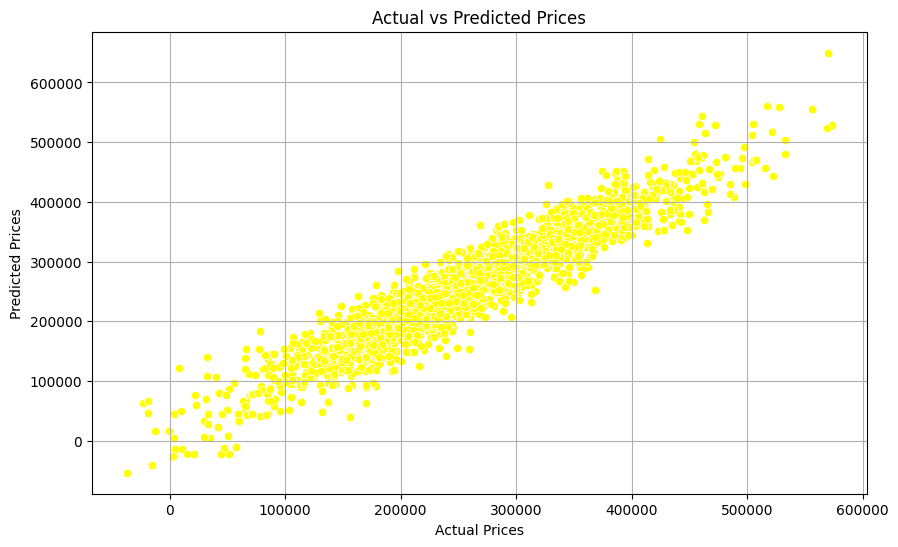

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, color='yellow')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

In [59]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print("MSE: ",MSE)
print("MAE: ",MAE)
print("R2: ", R2)

MSE:  1029663309.7045109
MAE:  25274.659148559753
R2:  0.8935913958475704


In [64]:
new_price = np.array([[1939,6,49,9]])
pred = model.predict(new_price)
print(pred)

[303370.78004956]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
